In [1]:
import os
import pandas as pd
from PIL import Image
from tqdm import tqdm

In [2]:
classes_file_path = "./LOC_synset_mapping.txt"

with open(classes_file_path) as file:
    classes = file.readlines()
    classes = [_class.split(" ")[0] for _class in classes]
    classes_to_id = {_class: class_id for class_id, (_class) in enumerate(classes)}

classes_to_id

{'n01440764': 0,
 'n01443537': 1,
 'n01484850': 2,
 'n01491361': 3,
 'n01494475': 4,
 'n01496331': 5,
 'n01498041': 6,
 'n01514668': 7,
 'n01514859': 8,
 'n01518878': 9,
 'n01530575': 10,
 'n01531178': 11,
 'n01532829': 12,
 'n01534433': 13,
 'n01537544': 14,
 'n01558993': 15,
 'n01560419': 16,
 'n01580077': 17,
 'n01582220': 18,
 'n01592084': 19,
 'n01601694': 20,
 'n01608432': 21,
 'n01614925': 22,
 'n01616318': 23,
 'n01622779': 24,
 'n01629819': 25,
 'n01630670': 26,
 'n01631663': 27,
 'n01632458': 28,
 'n01632777': 29,
 'n01641577': 30,
 'n01644373': 31,
 'n01644900': 32,
 'n01664065': 33,
 'n01665541': 34,
 'n01667114': 35,
 'n01667778': 36,
 'n01669191': 37,
 'n01675722': 38,
 'n01677366': 39,
 'n01682714': 40,
 'n01685808': 41,
 'n01687978': 42,
 'n01688243': 43,
 'n01689811': 44,
 'n01692333': 45,
 'n01693334': 46,
 'n01694178': 47,
 'n01695060': 48,
 'n01697457': 49,
 'n01698640': 50,
 'n01704323': 51,
 'n01728572': 52,
 'n01728920': 53,
 'n01729322': 54,
 'n01729977': 55,
 '

In [4]:
train_data_path = "/home/ahedayat/Documents/datasets/imagenet/ILSVRC/Data/CLS-LOC/train"

train_df = pd.DataFrame()

for _class in tqdm(classes):
    class_images = os.listdir(
        os.path.join(train_data_path, _class)
    )
    class_images_path = [os.path.join(train_data_path, _class, class_image) for class_image in class_images]
    
    class_id = classes_to_id[_class]

    train_df_class = pd.DataFrame({
        "data_path": class_images_path,
        "class_id": [class_id] * len(class_images_path)
    })

    train_df = pd.concat([train_df, train_df_class])

train_df = train_df.reset_index().drop(columns=["index"])
train_df = train_df.sample(frac=1)

train_df.to_csv("imagenet_train_data.csv")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 124.27it/s]


In [6]:
val_solutions_path = "./LOC_val_solution.csv"
data_path = "/home/ahedayat/Documents/datasets/imagenet/ILSVRC/Data/CLS-LOC/val"

val_df = pd.read_csv(val_solutions_path)

val_df["data_path"] = val_df["ImageId"].apply(lambda image_id: os.path.join(data_path, image_id) +  ".JPEG")
val_df["class"] = val_df["PredictionString"].apply(lambda x: x.split(" ")[0])
val_df["class_id"] = val_df["class"].apply(lambda _class: classes_to_id[_class])

val_df.to_csv("imagenet_val_data.csv")

In [7]:
val_df

,ImageId,PredictionString,data_path,class,class_id
0,ILSVRC2012_val_00048981,n03995372 85 1 499 272,/home/ahedayat/Documents/datasets/imagenet/ILS...,n03995372,740
1,ILSVRC2012_val_00037956,n03481172 131 0 499 254,/home/ahedayat/Documents/datasets/imagenet/ILS...,n03481172,587
2,ILSVRC2012_val_00026161,n02108000 38 0 464 280,/home/ahedayat/Documents/datasets/imagenet/ILS...,n02108000,241
3,ILSVRC2012_val_00026171,n03109150 0 14 216 299,/home/ahedayat/Documents/datasets/imagenet/ILS...,n03109150,512
4,ILSVRC2012_val_00008726,n02119789 255 142 454 329 n02119789 44 21 322 ...,/home/ahedayat/Documents/datasets/imagenet/ILS...,n02119789,278
...,...,...,...,...,...
49995,ILSVRC2012_val_00005961,n03388043 103 0 279 472,/home/ahedayat/Documents/datasets/imagenet/ILS...,n03388043,562
49996,ILSVRC2012_val_00008801,n03089624 101 286 170 374 n03089624 236 282 30...,/home/ahedayat/Documents/datasets/imagenet/ILS...,n03089624,509
49997,ILSVRC2012_val_00008176,n01518878 82 98 439 498,/home/ahedayat/Documents/datasets/imagenet/ILS...,n01518878,9
49998,ILSVRC2012_val_00004764,n03874293 91 111 490 420,/home/ahedayat/Documents/datasets/imagenet/ILS...,n03874293,694


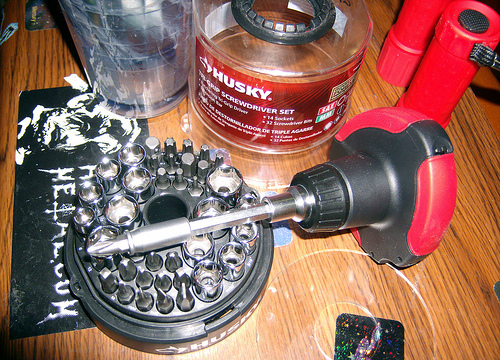

In [5]:
image_path = val_df.loc[0, "data_path"]

Image.open(image_path)

In [41]:
sample_1000_val = val_df.copy()

sample_1000_val = sample_1000_val.sample(n=1000)
sample_1000_val["processed"] = 0

sample_1000_val.to_csv("./sample_1000_val.csv", index=False)

In [10]:
val_solutions_path = "./LOC_val_solution.csv"
data_path = "/opt/data/hedayat/ILSVRC/Data/CLS-LOC/val"

val_df = pd.read_csv(val_solutions_path)

sample_100_val = val_df.copy()

sample_100_val = sample_100_val.sample(n=100)

sample_100_val["root"] = data_path
sample_100_val["image_name"] = sample_100_val["ImageId"].apply(lambda image_id: image_id +  ".JPEG")
sample_100_val["data_path"] = sample_100_val["ImageId"].apply(lambda image_id: os.path.join(data_path, image_id) +  ".JPEG")
sample_100_val["class"] = sample_100_val["PredictionString"].apply(lambda x: x.split(" ")[0])
sample_100_val["class_id"] = sample_100_val["class"].apply(lambda _class: classes_to_id[_class])

sample_100_val.to_csv("./sample_100_val.csv", index=False)